C:\Users\Michahaha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


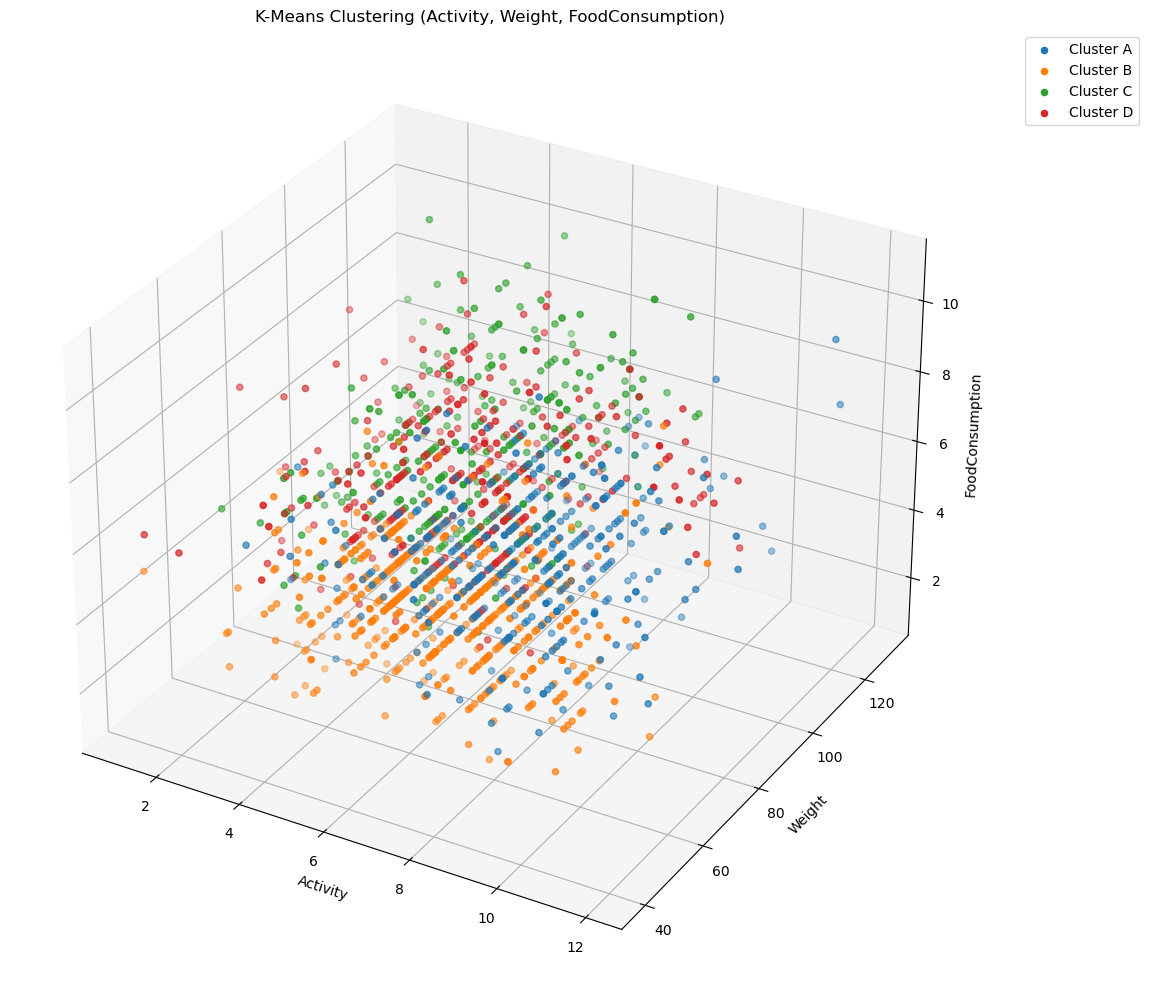

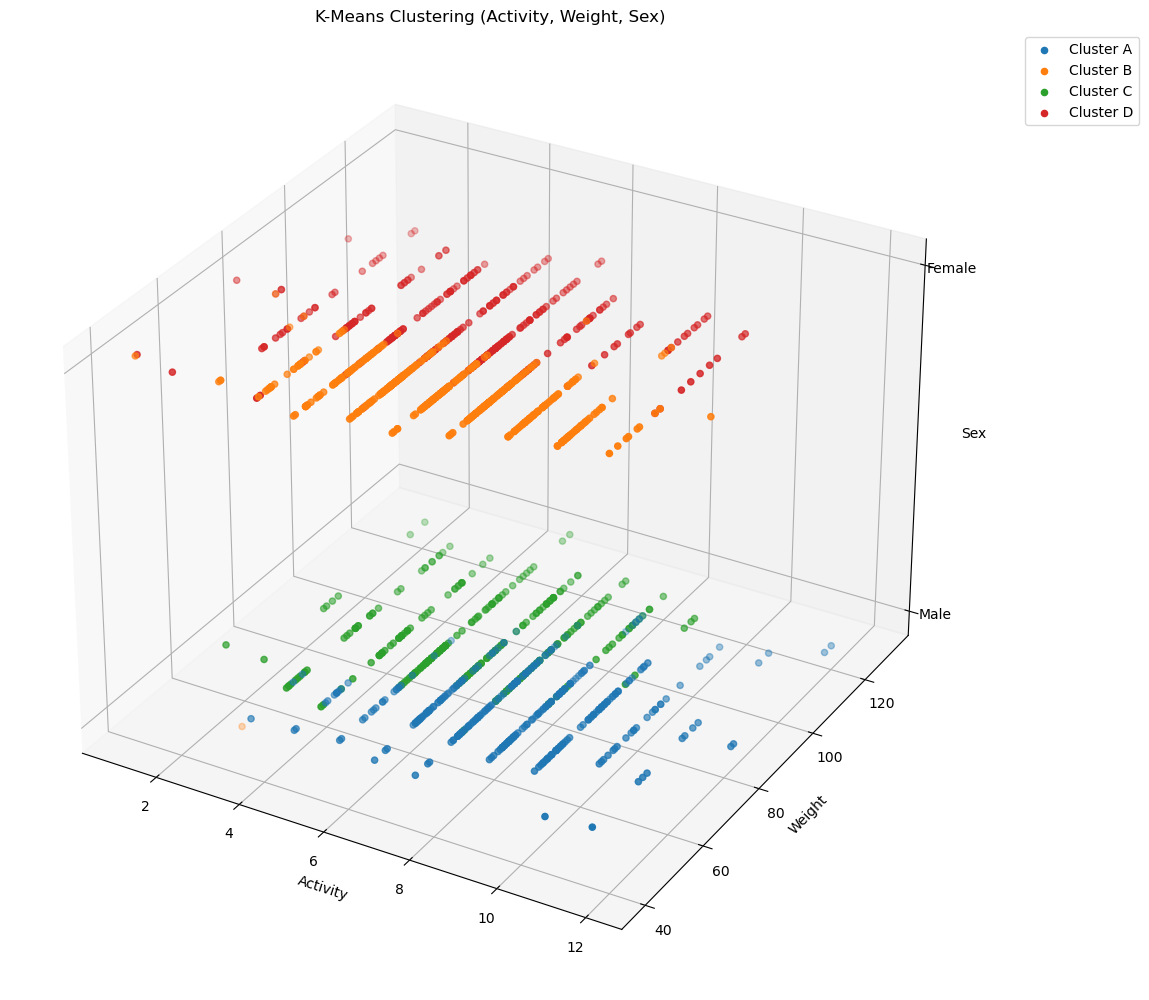

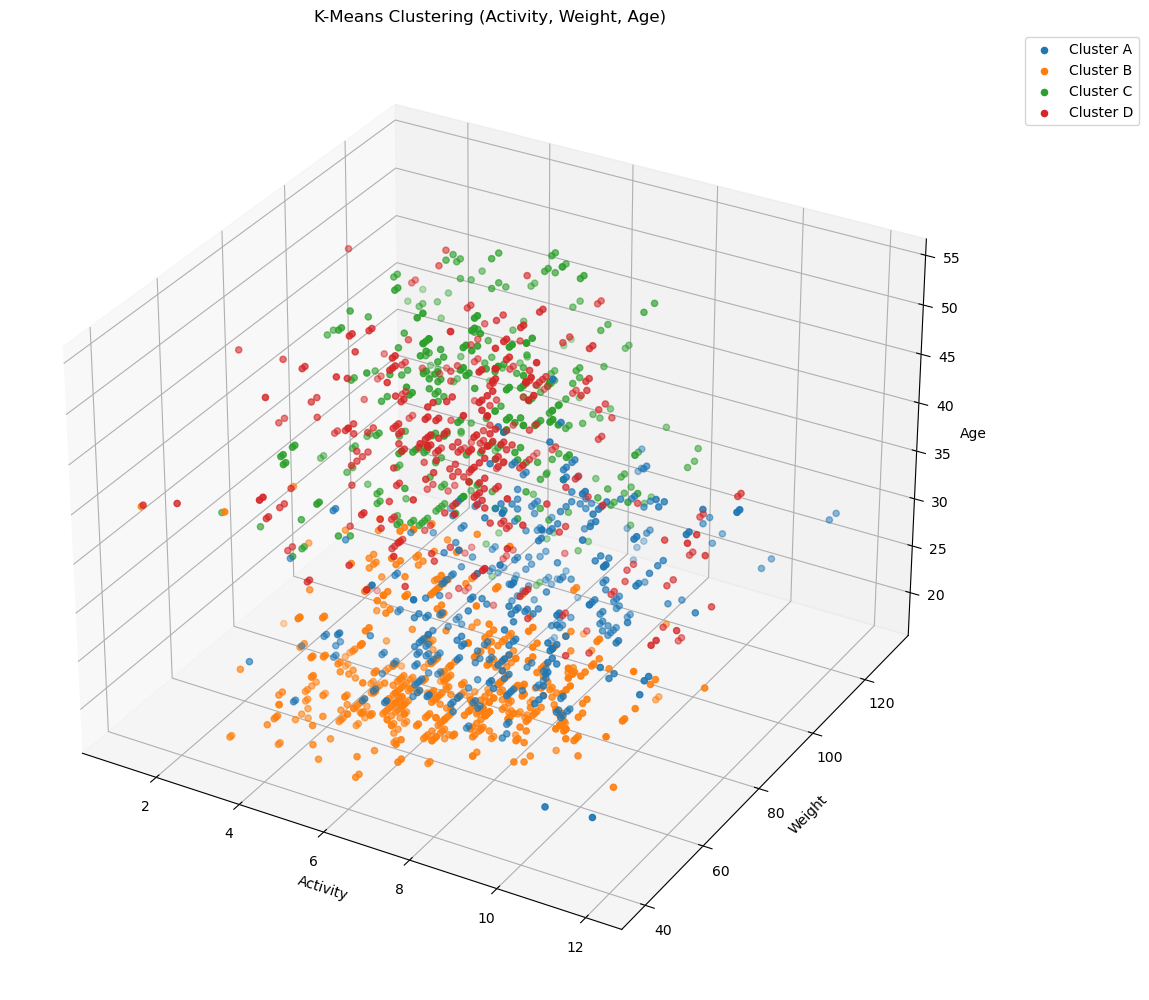

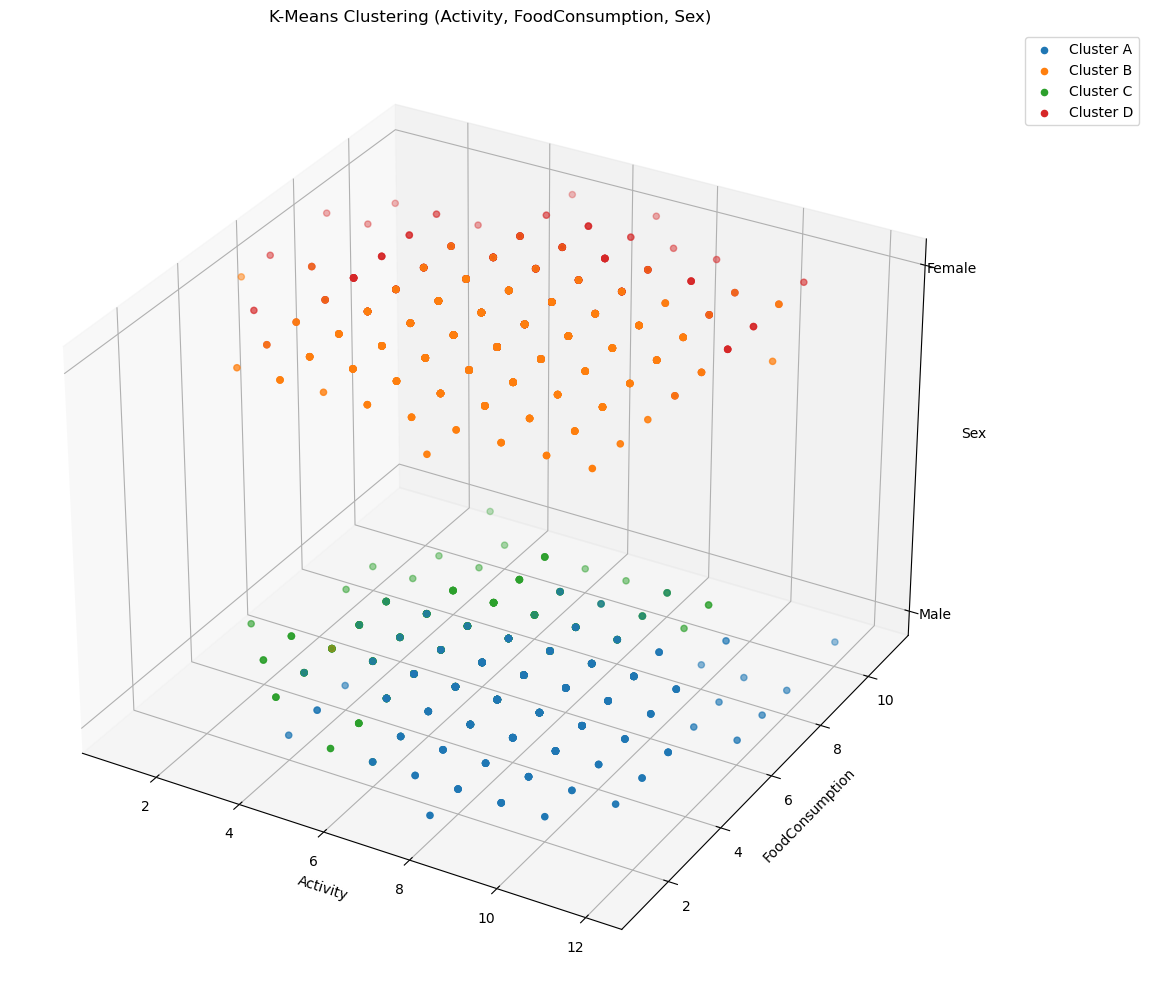

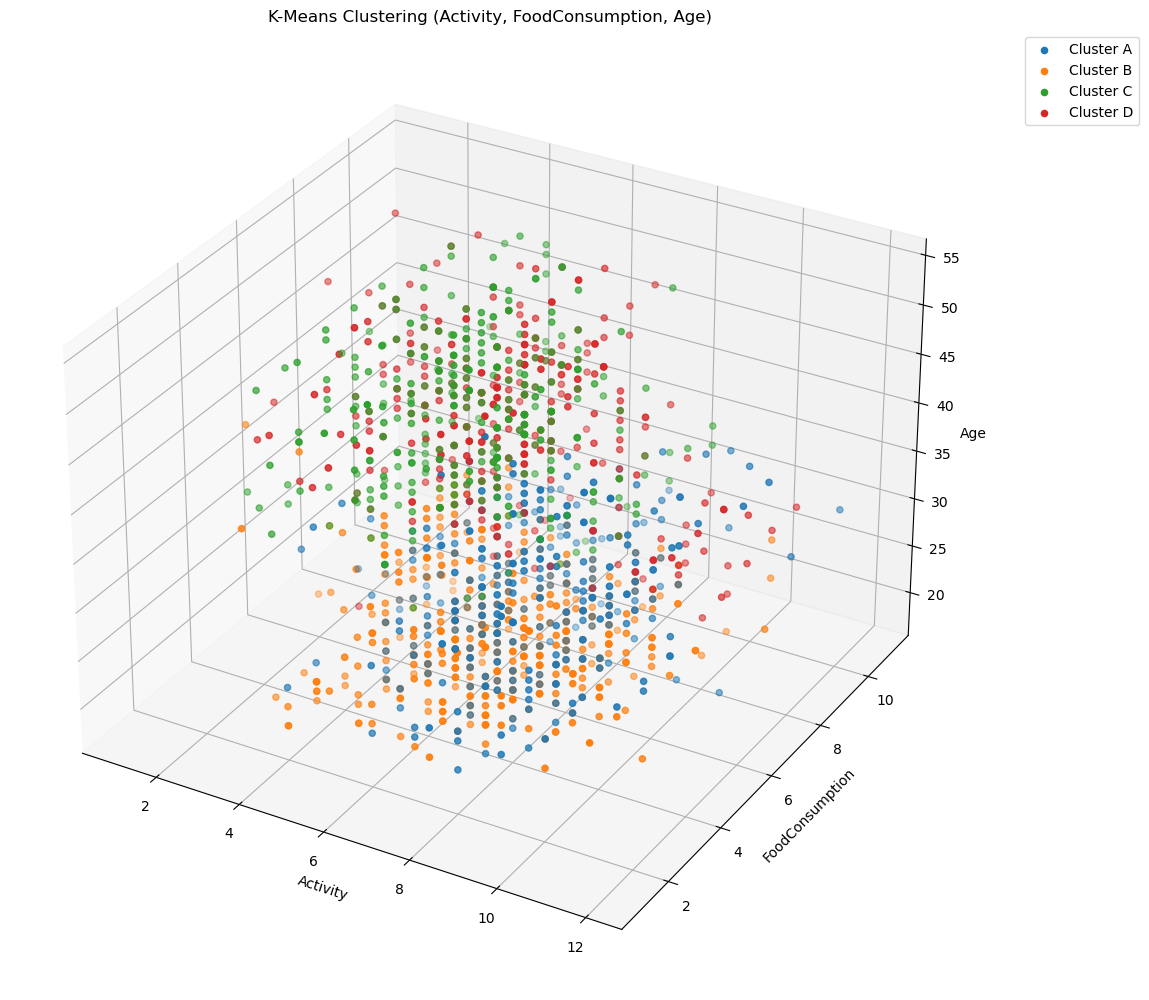

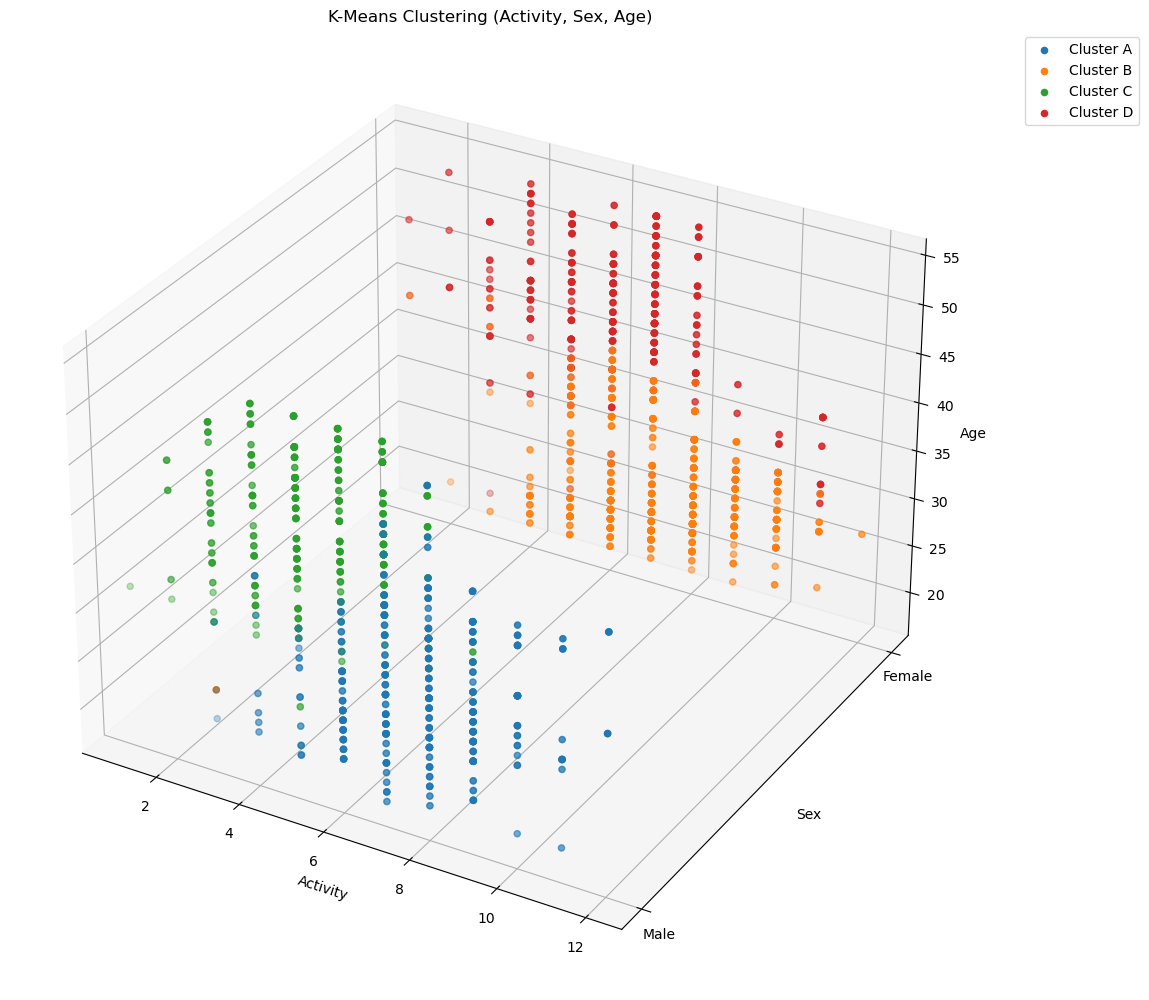

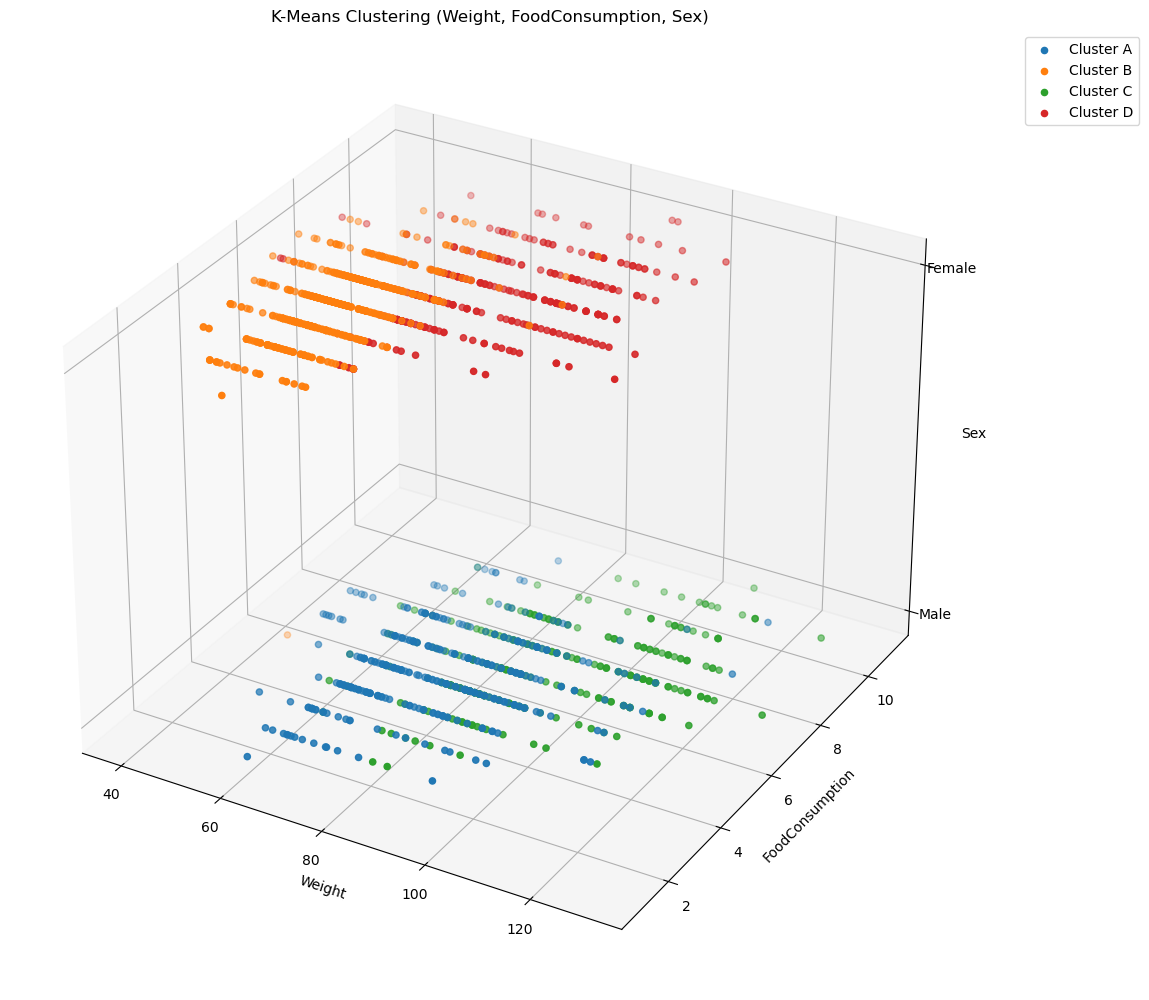

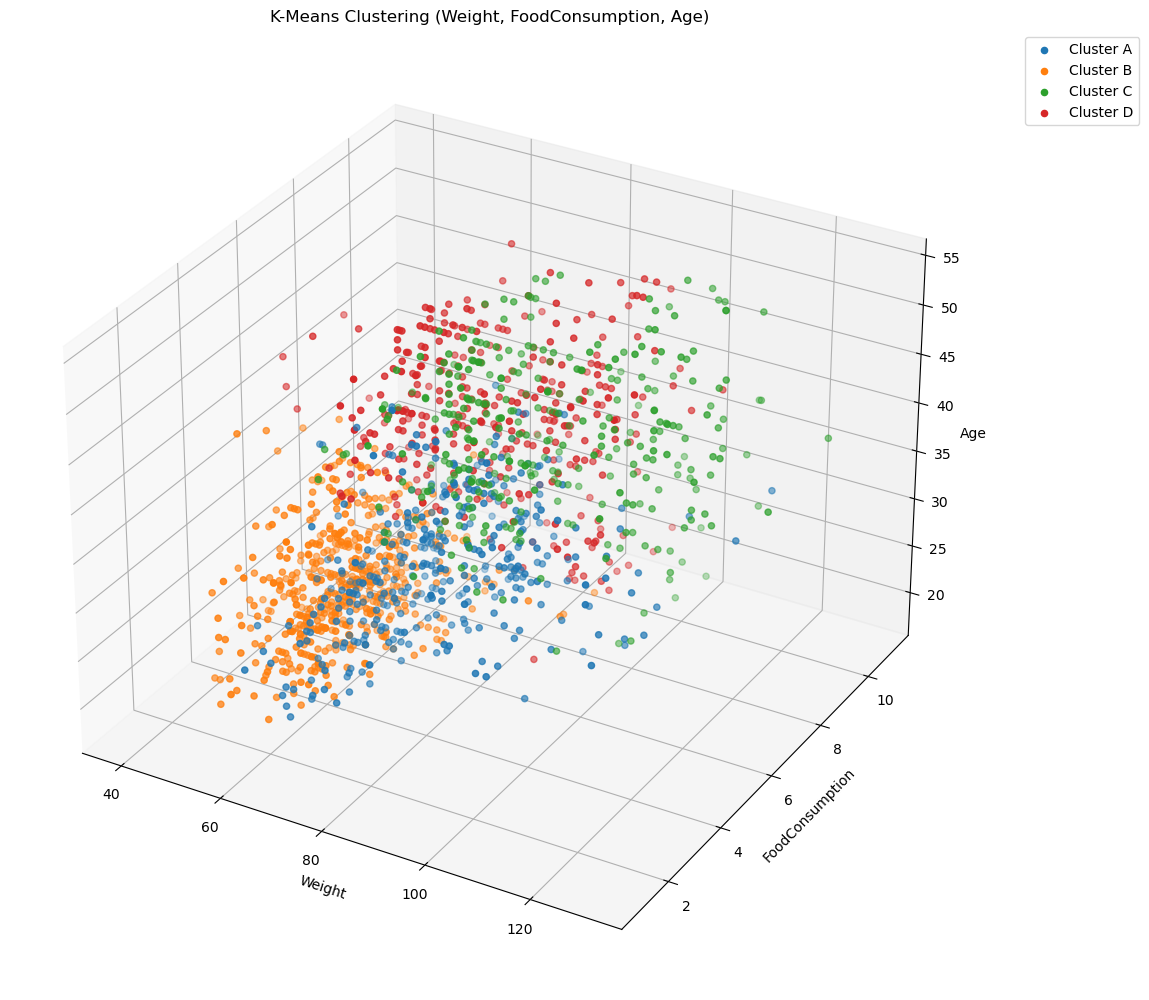

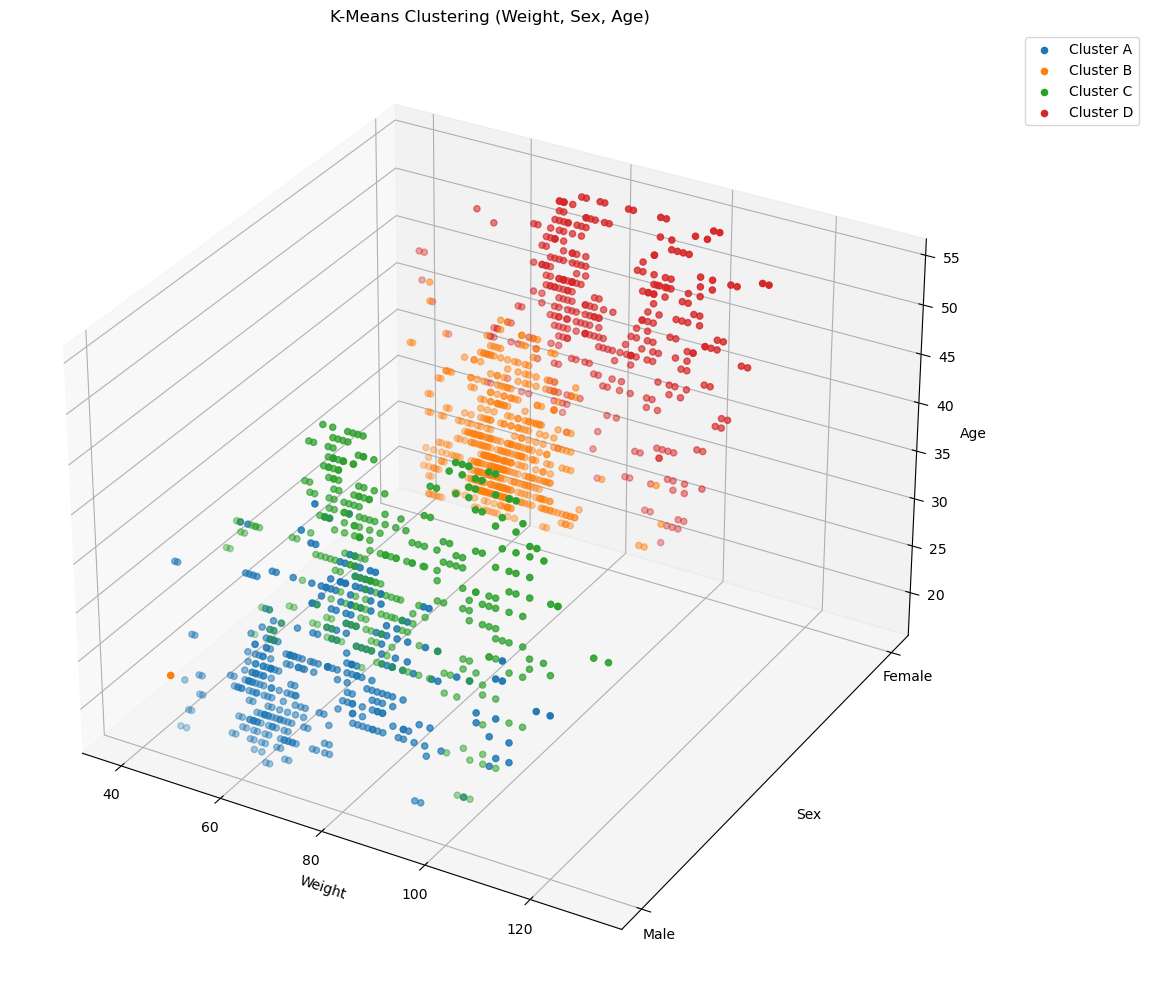

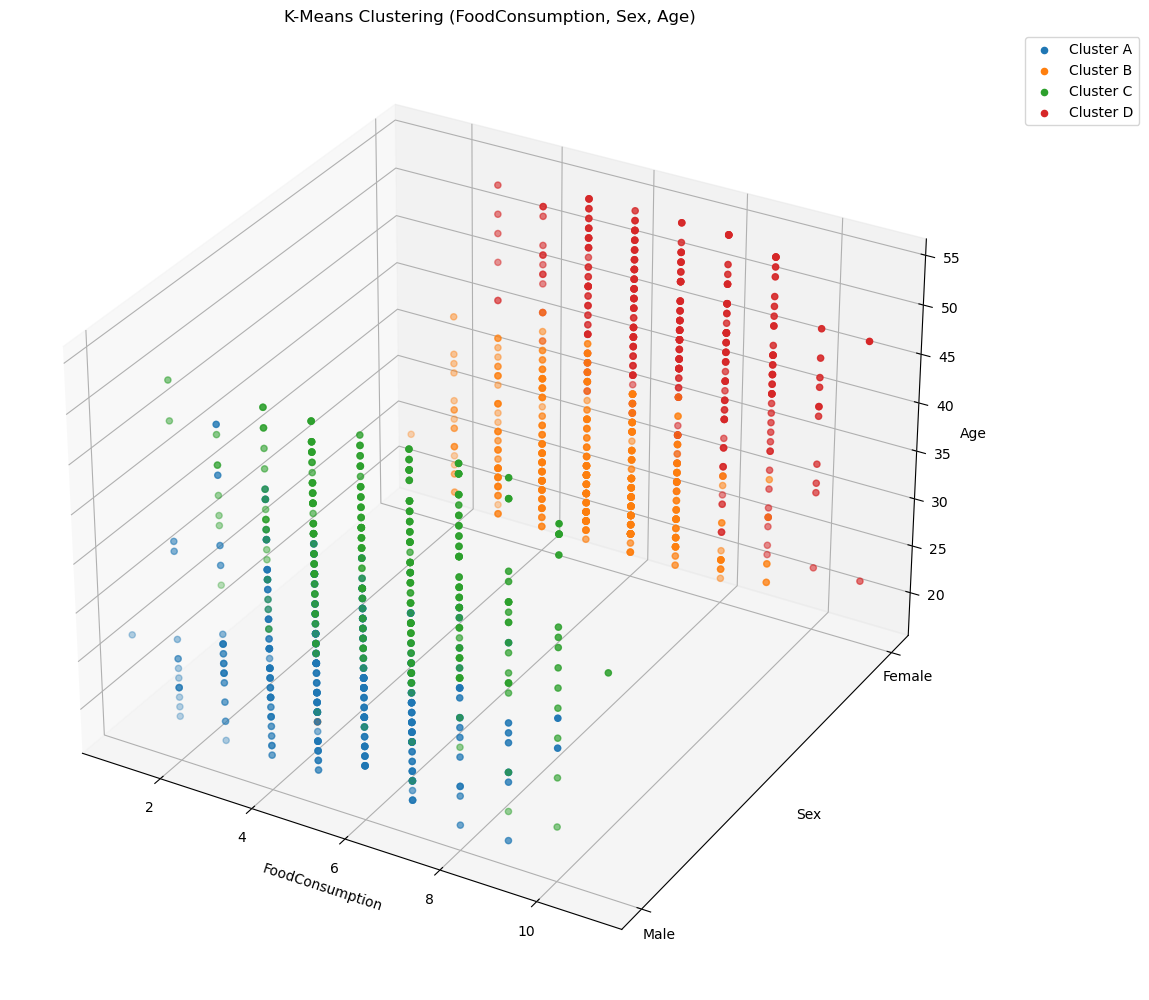

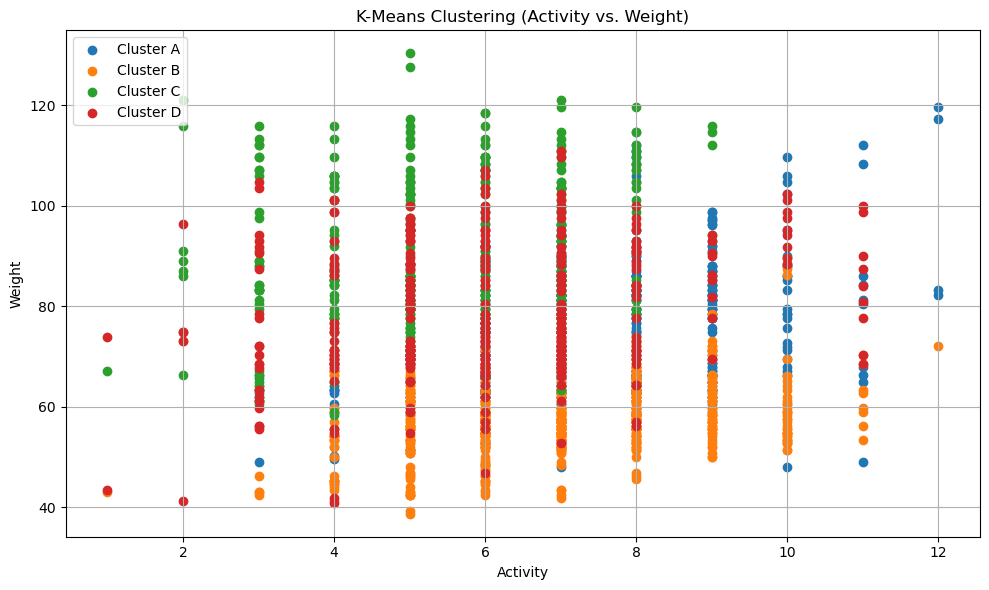

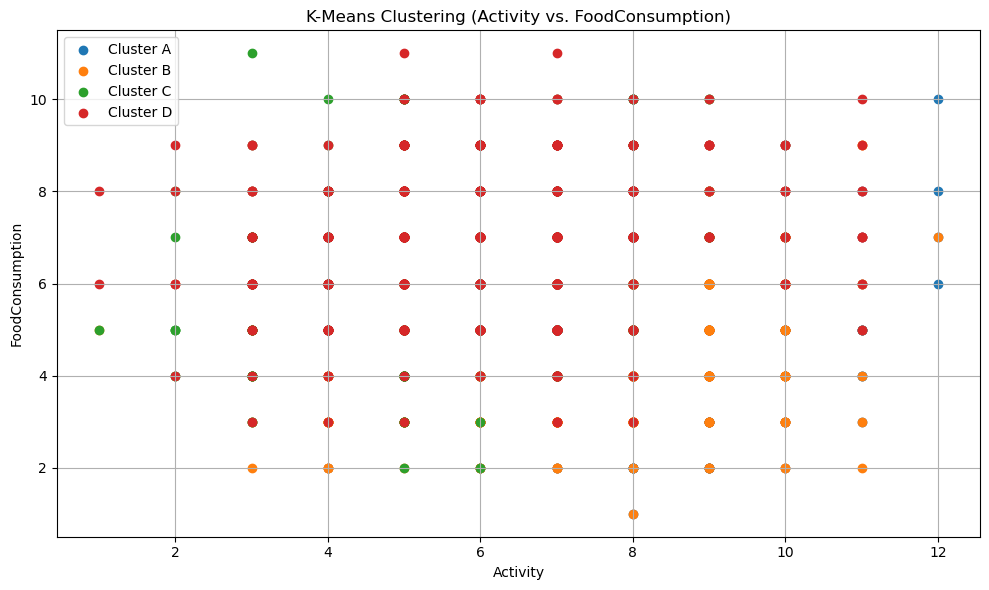

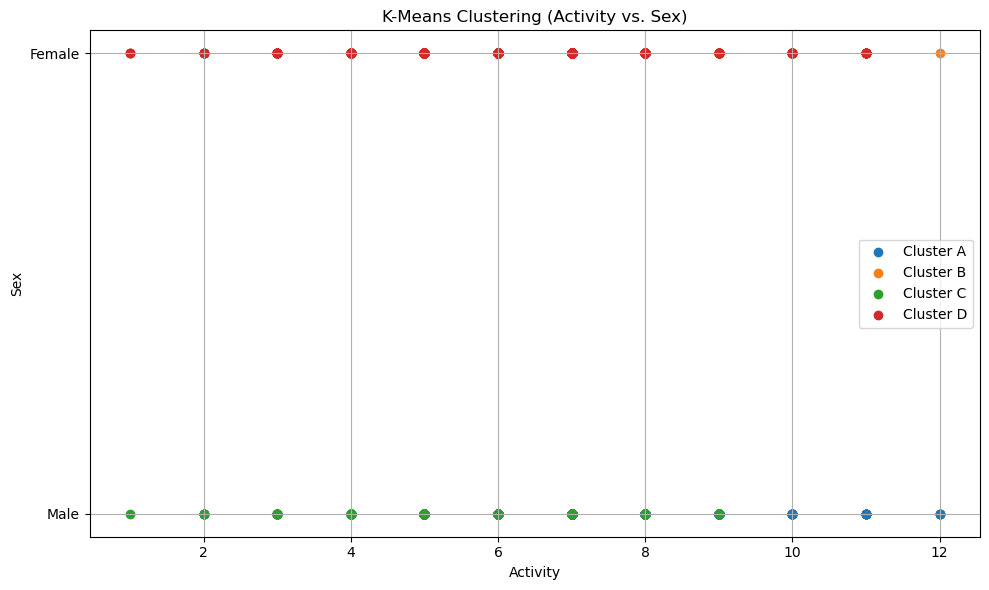

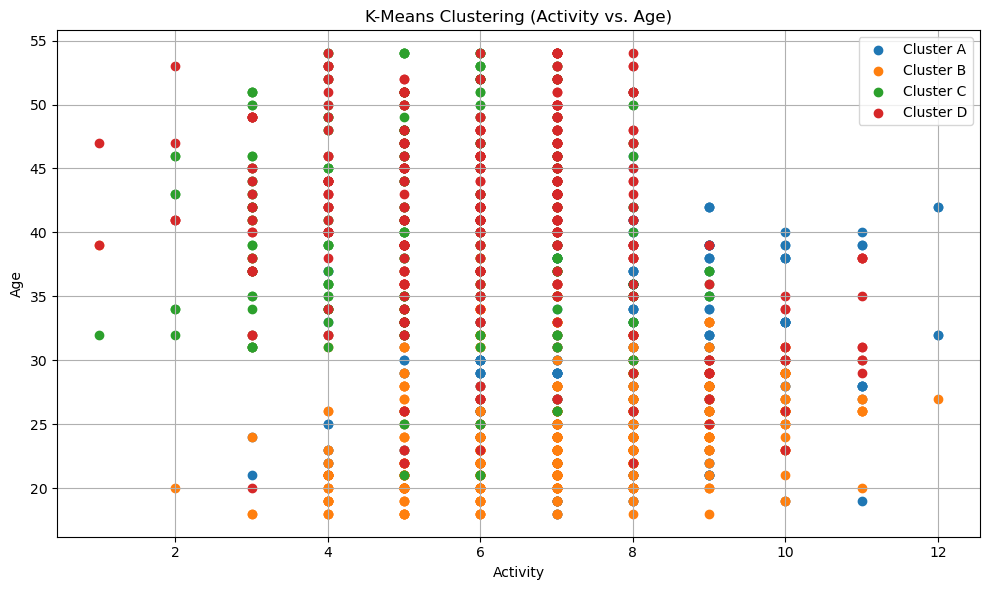

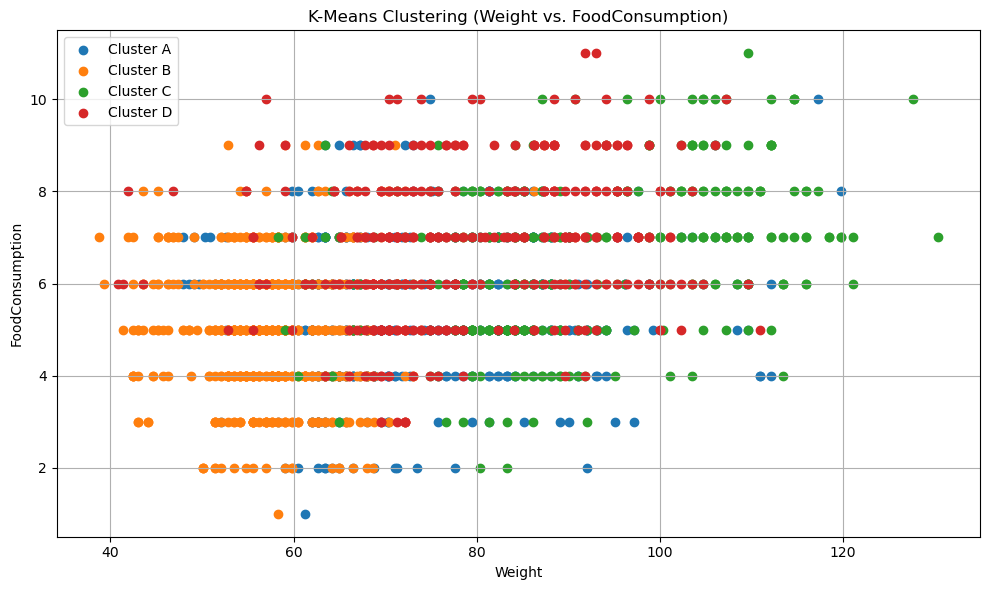

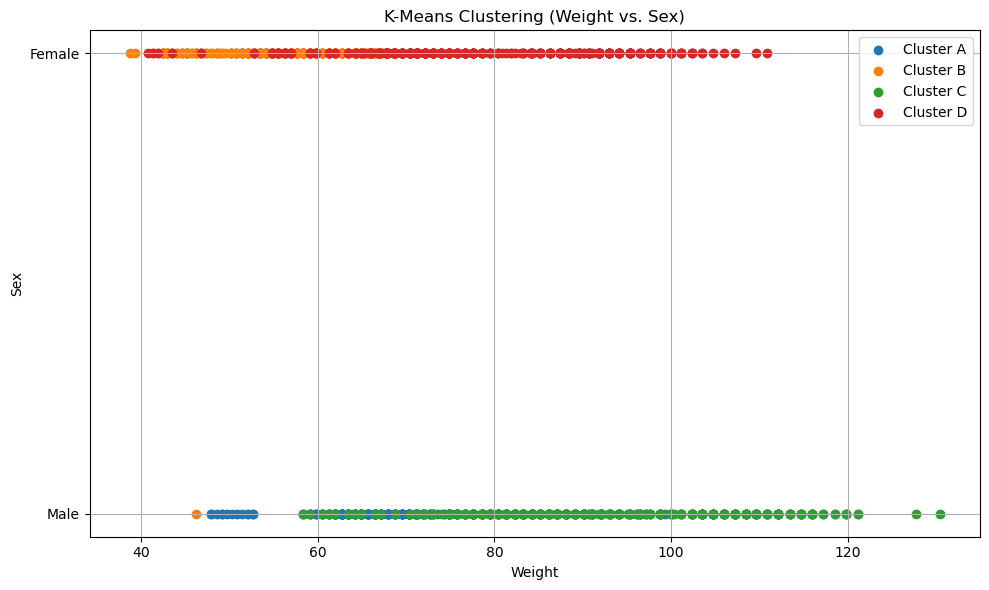

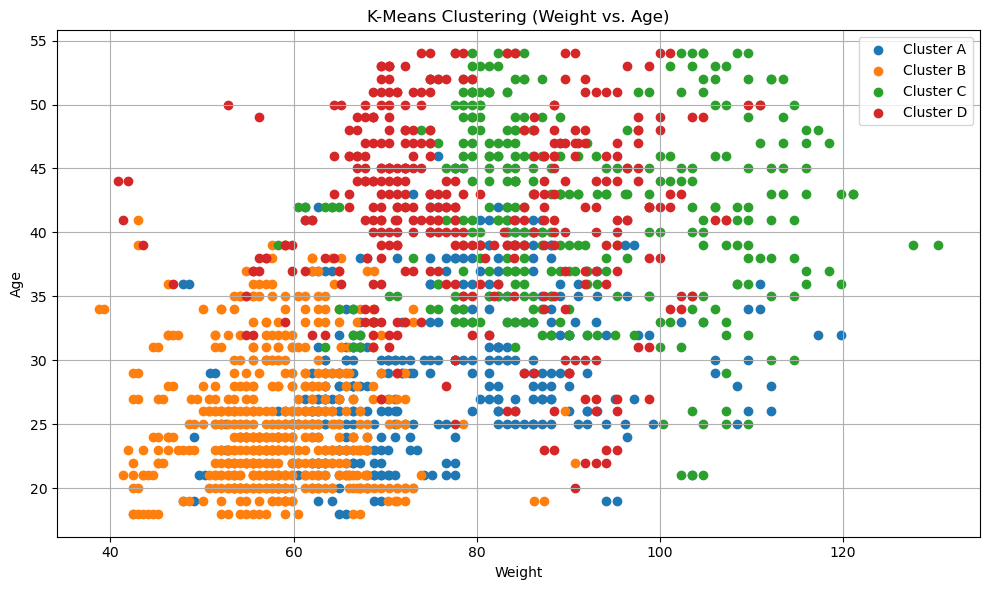

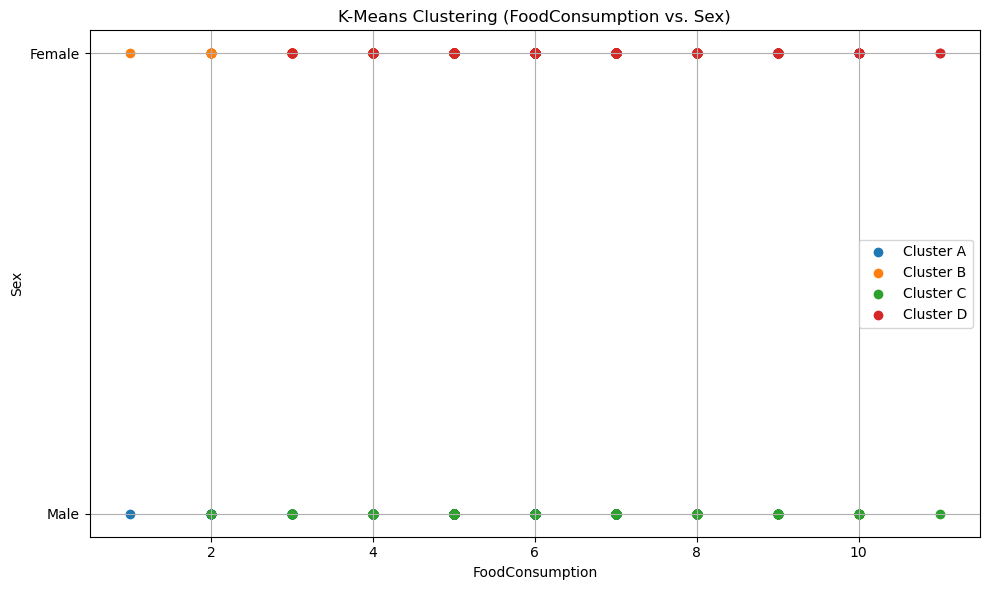

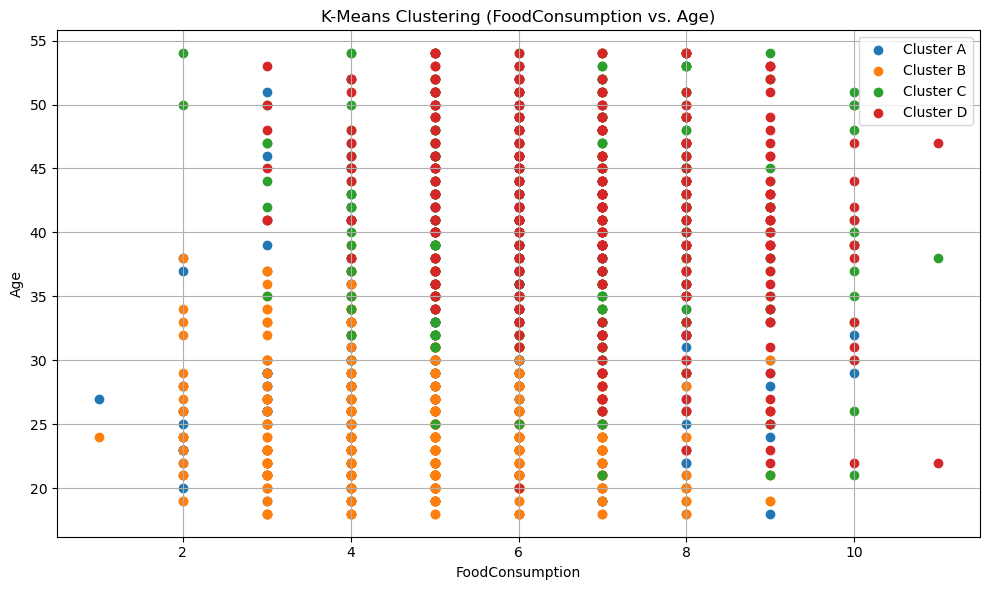

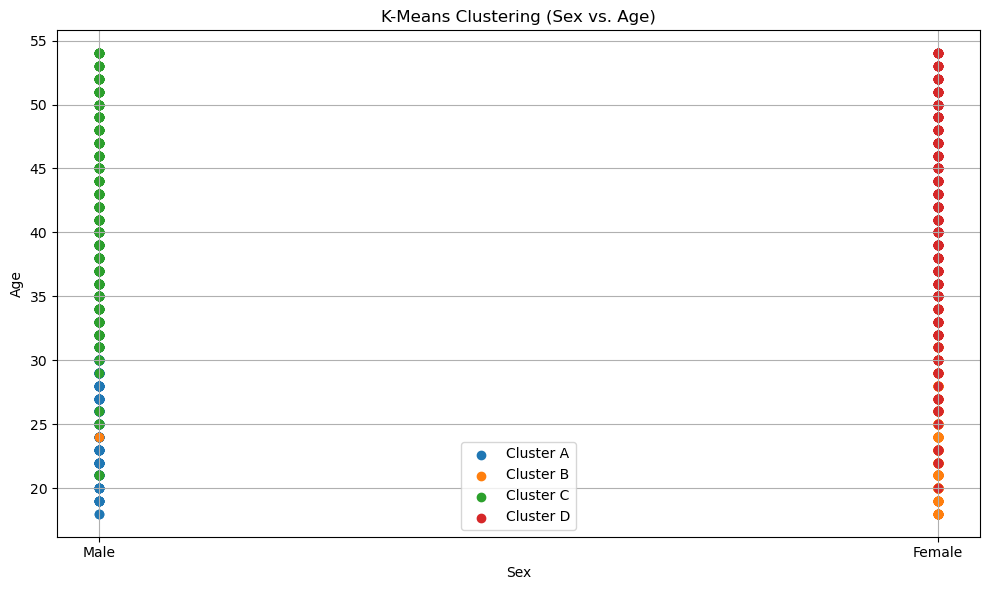

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datei laden
file_path = "data/Obesity_Dataset_FE.xlsx"
data = pd.read_excel(file_path)

# Relevante Spalten auswählen, einschließlich Sex und Age
selected_columns = ['Activity', 'Weight', 'FoodConsumption', 'Sex', 'Age']
data_selected = data[selected_columns].copy()  # Kopie erstellen, um SettingWithCopyWarning zu vermeiden

# Kategorische Variable 'Sex' in numerische Werte umwandeln
# Angenommen, "Sex" hat Werte wie "Male", "Female", "Other".
data_selected['Sex'] = data_selected['Sex'].astype('category').cat.codes

# Filter: Nur Werte 0 (Male) und 1 (Female) in der Spalte 'Sex' behalten
data_selected = data_selected[data_selected['Sex'].isin([0, 1])]

# Daten skalieren
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# K-Means-Clusteranalyse
kmeans = KMeans(n_clusters=4, random_state=2, n_init=20)
kmeans.fit(data_scaled)

# Cluster-Zuordnungen hinzufügen
data_selected['Cluster'] = kmeans.labels_

# Benutzerdefinierte Cluster-Namen
cluster_names = ['Cluster A', 'Cluster B', 'Cluster C', 'Cluster D']

# Achsentick-Labels für Sex
sex_labels = {0: "Male", 1: "Female"}

# 1. 3D-Visualisierungen für alle Kombinationen von Dimensionen
dimensions = ['Activity', 'Weight', 'FoodConsumption', 'Sex', 'Age']
fig_num = 1

# Innerhalb der 3D-Plot-Schleife
for i in range(len(dimensions)):
    for j in range(i + 1, len(dimensions)):
        for k in range(j + 1, len(dimensions)):
            fig = plt.figure(fig_num, figsize=(16, 12))  # Größeres Diagramm
            ax = fig.add_subplot(111, projection='3d')
            fig_num += 1

            for cluster in range(4):
                cluster_data = data_selected[data_selected['Cluster'] == cluster]
                ax.scatter(
                    cluster_data[dimensions[i]],
                    cluster_data[dimensions[j]],
                    cluster_data[dimensions[k]],
                    label=cluster_names[cluster]
                )

            ax.set_title(f'K-Means Clustering ({dimensions[i]}, {dimensions[j]}, {dimensions[k]})')
            ax.set_xlabel(dimensions[i])
            ax.set_ylabel(dimensions[j])
            ax.set_zlabel(dimensions[k])

            # Achsenticks für Sex
            if dimensions[i] == 'Sex':
                ax.set_xticks([0, 1])
                ax.set_xticklabels([sex_labels[0], sex_labels[1]])
            if dimensions[j] == 'Sex':
                ax.set_yticks([0, 1])
                ax.set_yticklabels([sex_labels[0], sex_labels[1]])
            if dimensions[k] == 'Sex':
                ax.set_zticks([0, 1])
                ax.set_zticklabels([sex_labels[0], sex_labels[1]])

            # Legende verschieben
            ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))  # Legende außerhalb platzieren
            plt.subplots_adjust(left=0.05, right=0.85, top=0.9, bottom=0.1)  # Mehr Platz für Achsentitel
            plt.show()


# 2. 2D-Visualisierungen für alle Kombinationen von Dimensionen
for i in range(len(dimensions)):
    for j in range(i + 1, len(dimensions)):
        # 2D-Plot für jede Kombination von zwei Dimensionen
        plt.figure(figsize=(10, 6))
        for cluster in range(4):
            cluster_data = data_selected[data_selected['Cluster'] == cluster]
            plt.scatter(
                cluster_data[dimensions[i]],
                cluster_data[dimensions[j]],
                label=cluster_names[cluster]
            )

        plt.title(f'K-Means Clustering ({dimensions[i]} vs. {dimensions[j]})')
        plt.xlabel(dimensions[i])
        plt.ylabel(dimensions[j])

        # Achsenbeschriftungen für Sex anpassen
        if dimensions[i] == 'Sex':
            plt.xticks([0, 1], [sex_labels[0], sex_labels[1]])
        if dimensions[j] == 'Sex':
            plt.yticks([0, 1], [sex_labels[0], sex_labels[1]])

        plt.legend()
        plt.grid(True)
        plt.tight_layout()  # Verhindert, dass der rechte Bereich abgeschnitten wird
        plt.show()
